# Workshop 1 - Descriptive Statistics & Histogram


Ricardo Andrés Cáceres Villibord

9 de Agosto del 2023

*Complete Workshop Instructions can be found at: https://rpubs.com/cdorante/tc3006c_w1*

---
### ***Import de las librerias***

In [78]:
#IMPORT THE 
import numpy as np
import pandas as pd
import yfinance as yf

### ***Descarga los Daily prices de Bitcoin desde 2017***

In [79]:
BTC=yf.download(tickers="BTC-USD", start="2017-01-01",interval="1mo")

[*********************100%***********************]  1 of 1 completed


- **Show the content of the data**

In [80]:
print(BTC)

                    Open          High           Low         Close  \
Date                                                                 
2017-01-01    963.658020   1191.099976    755.755981    970.403015   
2017-02-01    970.940979   1200.390015    946.690979   1179.969971   
2017-03-01   1180.040039   1280.310059    903.713013   1071.790039   
2017-04-01   1071.709961   1347.910034   1061.089966   1347.890015   
2017-05-01   1348.300049   2763.709961   1348.300049   2286.409912   
...                  ...           ...           ...           ...   
2023-04-01  28473.332031  31005.607422  27070.849609  29268.806641   
2023-05-01  29227.103516  29820.126953  25878.429688  27219.658203   
2023-06-01  27218.412109  31389.539062  24797.167969  30477.251953   
2023-07-01  30471.847656  31814.515625  28934.294922  29230.111328   
2023-08-01  29230.873047  30176.796875  28657.023438  29403.761719   

               Adj Close        Volume  
Date                                    
2017-01

- ***Show the last quotations***

In [81]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-01,28473.332031,31005.607422,27070.849609,29268.806641,29268.806641,511540319004
2023-05-01,29227.103516,29820.126953,25878.429688,27219.658203,27219.658203,443473015479
2023-06-01,27218.412109,31389.539062,24797.167969,30477.251953,30477.251953,481734214225
2023-07-01,30471.847656,31814.515625,28934.294922,29230.111328,29230.111328,382224489090
2023-08-01,29230.873047,30176.796875,28657.023438,29403.761719,29403.761719,138317281350


### ***Import the matplotlib and do a plot for the Bitcoin closign prices***

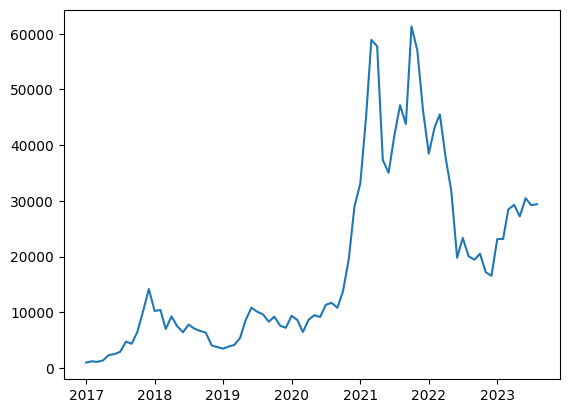

In [82]:
import matplotlib
from matplotlib.pyplot import *
plot(BTC["Adj Close"])
show()

- ***We can check the data types of each variable (column) in the dataset***

In [83]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2017-01-01 to 2023-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       80 non-null     float64
 1   High       80 non-null     float64
 2   Low        80 non-null     float64
 3   Close      80 non-null     float64
 4   Adj Close  80 non-null     float64
 5   Volume     80 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.4 KB


### ***Promedio y std de la columna volumen***

PROMEDIO VOLUMEN:  671229117389.925
STD Volumen:  523840477905.43134 



<AxesSubplot: >

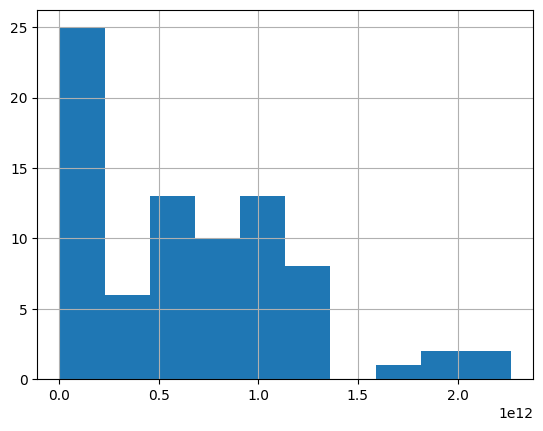

In [84]:
#promedio y std de la columna volumen
promedio_volumen = BTC["Volume"].mean()
std_volumen = BTC["Volume"].std()
print("PROMEDIO VOLUMEN: ",promedio_volumen)
print("STD Volumen: ", std_volumen, "\n")

#histogram
BTC["Volume"].hist()

### ***In Python we can get the previous value of a variable using the shift(n) function. This function works for Panda dataframes. Then we can calculate a new column for the simple returns of Bitcoin as follows:***

In [85]:
BTC["Return"] = (BTC["Adj Close"] / BTC["Adj Close"].shift(1)) - 1
print(BTC)

                    Open          High           Low         Close  \
Date                                                                 
2017-01-01    963.658020   1191.099976    755.755981    970.403015   
2017-02-01    970.940979   1200.390015    946.690979   1179.969971   
2017-03-01   1180.040039   1280.310059    903.713013   1071.790039   
2017-04-01   1071.709961   1347.910034   1061.089966   1347.890015   
2017-05-01   1348.300049   2763.709961   1348.300049   2286.409912   
...                  ...           ...           ...           ...   
2023-04-01  28473.332031  31005.607422  27070.849609  29268.806641   
2023-05-01  29227.103516  29820.126953  25878.429688  27219.658203   
2023-06-01  27218.412109  31389.539062  24797.167969  30477.251953   
2023-07-01  30471.847656  31814.515625  28934.294922  29230.111328   
2023-08-01  29230.873047  30176.796875  28657.023438  29403.761719   

               Adj Close        Volume    Return  
Date                                  

### ***Now we calculate cc returns in a new column using the shift function:***

In [86]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['Return','r']].copy()

### ***We have a null value for the first day since we cannot calculate returns for day 1. We can drop the rows with NA values to ease data calculations:***

In [87]:
BTCR= BTCR.dropna()

### ***We can use the describe function applied to the r column as follows:***

In [88]:
sumret = BTC["Return"].describe()
sumret

count    79.000000
mean      0.070511
std       0.242284
min      -0.377688
25%      -0.077135
50%       0.017298
75%       0.234738
max       0.696288
Name: Return, dtype: float64

### ***To know which days were the worse, we can do a selection based on a condition. Let’s see which days had a daily return less than 15%:***

In [89]:
#Worst days
BTCR[BTCR["Return"]<-0.15]

,Return,r
Date,,
2018-01-01,-0.277987,-0.325713
2018-03-01,-0.329333,-0.399482
2018-05-01,-0.188991,-0.209476
2018-11-01,-0.364116,-0.452739
2019-11-01,-0.177177,-0.195014
2020-03-01,-0.251278,-0.289387
2021-05-01,-0.353546,-0.436253
2021-12-01,-0.187684,-0.207865
2022-01-01,-0.168947,-0.185061


### ***To know the best days for Bitcoin:***

In [90]:
#Best Days
BTCR[BTCR["Return"]>0.15].sort_values(by=['Return'], ascending=False)

,Return,r
Date,,
2017-05-01,0.696288,0.528442
2017-08-01,0.635768,0.492113
2019-05-01,0.602493,0.471561
2017-11-01,0.582091,0.458748
2017-10-01,0.490858,0.399352
2020-12-01,0.477732,0.390508
2020-11-01,0.424123,0.353556
2021-10-01,0.400267,0.336663
2023-01-01,0.398356,0.335297


### ***We can also get the main descriptive statistics using specific functions like:***

In [91]:
print("The daily average return of Bitcoin is ", BTCR["r"].mean())
print("The daily variance of Bitcoin is ", BTCR["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTCR["r"].std())
print("The daily median return of Bitcoin is ",BTCR["r"].median())

The daily average return of Bitcoin is  0.04317932189907801
The daily variance of Bitcoin is  0.05068458158491448
The daily standard deviation (volatility) of Bitcoin return is  0.22513236458784525
The daily median return of Bitcoin is  0.01714972738881393


---
## Challenge: Histogram

- Do a histogram for daily Bitcoin cc returns. Hints: use the plot.hist function for pandas dataframes, and the BTC dataframe.

- Interpret the histogram with your own words and in CAPITAL LETTERS


<AxesSubplot: title={'center': 'Historgram for Daily Bitcoin cc returns'}, ylabel='Frequency'>

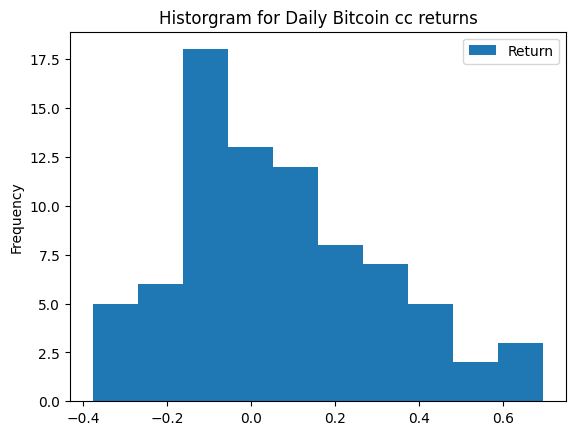

In [92]:
returnBTC = pd.DataFrame(BTCR[["Return"]])
returnBTC.plot.hist(title="Historgram for Daily Bitcoin cc returns")


---
## Challenge: Simulating the Normal Distribution

- Use the mean and standard deviation of the historical cc returns of Bitcoin and simulate the same # of returns as the days we dowloaded in the BTCR dataframe.

- In one plot show both, the real distribution of historical cc returns and the simulated normal distribution

- DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS? BRIEFLY EXPLAIN.

lkxnksjnkxjsn